# Logistic Regression

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [7]:
# For reproducibility
np.random.seed(1000)

nb_samples = 500

## 畫出sample data
Draw the sample data

In [8]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(10, 9))
    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')
    plt.show()    

## 由訓練的模型畫出分類區域
Draw the classification area

In [11]:
def show_classification_areas(X, Y, LoReg):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = LoReg.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(10, 9))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
    plt.scatter(X[:, 0], X[:, 1], c=np.abs(Y - 1),
                edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

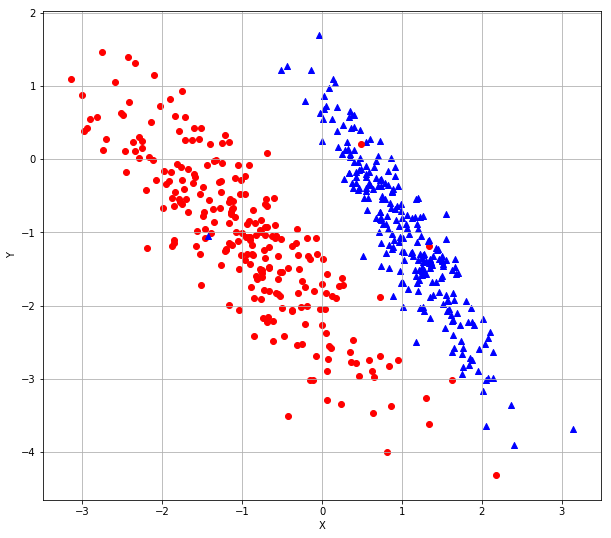

logistic迴歸 成績: 1.000
logistic迴歸 交叉值成績: 0.988


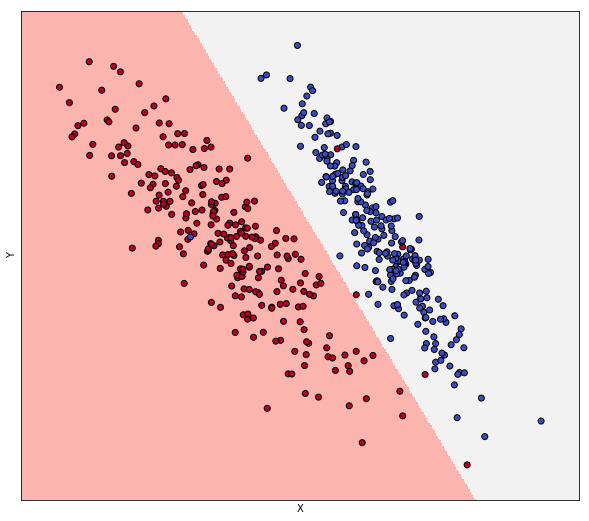

In [12]:
if __name__ == '__main__':
    # 建立資料
    X, Y = make_classification(n_samples=nb_samples, n_features=2,
                               n_informative=2, n_redundant=0,
                               n_clusters_per_class=1)
    show_dataset(X, Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                            test_size=0.25)
    # 建立logistic迴歸
    LoReg = LogisticRegression()
    LoReg.fit(X_train, Y_train)
    print('logistic迴歸 成績: %.3f' % LoReg.score(X_test, Y_test))
    # 計算交叉值成績
    lr_scores = cross_val_score(LoReg, X, Y, scoring='accuracy',
                                cv=10)
    print('logistic迴歸 交叉值成績: %.3f' % lr_scores.mean())
    # 顯示分類區域
    show_classification_areas(X, Y, LoReg)